<a href="https://colab.research.google.com/github/nipunraj09/Machine-Learning-Codes/blob/main/Copy_of_BCI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

End-Effector Coordinates: (x, y) = (0.50, 1.48)
Jacobian Matrix:
[[-1.47984744 -0.77274066]
 [ 0.50005155 -0.20705524]]
End-Effector Velocities: (x_dot, y_dot) = (-0.97, 0.19)


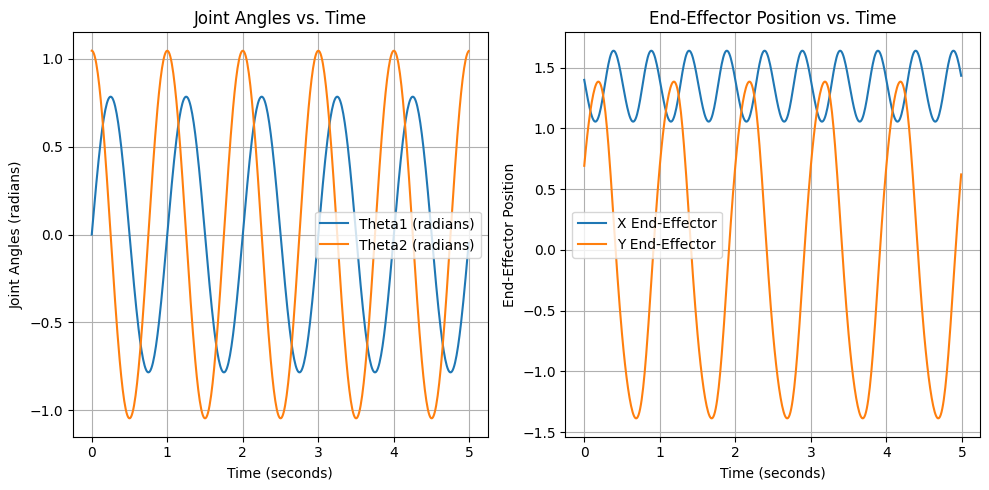

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1, theta2, L1, L2):
    """
    Compute the forward kinematics of a two-link planar manipulator.

    Parameters:
        theta1 (float): Joint angle of the first link in radians.
        theta2 (float): Joint angle of the second link in radians.
        L1 (float): Length of the first link.
        L2 (float): Length of the second link.

    Returns:
        (float, float): Coordinates (x, y) of the end-effector.
    """
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

def jacobian_matrix(theta1, theta2, L1, L2):
    """
    Compute the Jacobian matrix of a two-link planar manipulator.

    Parameters:
        theta1 (float): Joint angle of the first link in radians.
        theta2 (float): Joint angle of the second link in radians.
        L1 (float): Length of the first link.
        L2 (float): Length of the second link.

    Returns:
        numpy.ndarray: Jacobian matrix.
    """
    J11 = -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2)
    J12 = -L2 * np.sin(theta1 + theta2)
    J21 = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    J22 = L2 * np.cos(theta1 + theta2)

    J = np.array([[J11, J12],
                  [J21, J22]])

    return J

if __name__ == "__main__":
    theta1 = np.pi / 4  # Joint angle of the first link in radians (45 degrees)
    theta2 = np.pi / 3  # Joint angle of the second link in radians (60 degrees)
    L1 = 1.0  # Length of the first link
    L2 = 0.8  # Length of the second link

    x_end, y_end = forward_kinematics(theta1, theta2, L1, L2)
    Jacobian = jacobian_matrix(theta1, theta2, L1, L2)

    # Compute end-effector velocities using Jacobian matrix
    theta1_dot = 0.5  # Joint angular velocity of the first link
    theta2_dot = 0.3  # Joint angular velocity of the second link

    joint_velocities = np.array([theta1_dot, theta2_dot])
    end_effector_velocities = np.dot(Jacobian, joint_velocities)

    print(f"End-Effector Coordinates: (x, y) = ({x_end:.2f}, {y_end:.2f})")
    print("Jacobian Matrix:")
    print(Jacobian)
    print(f"End-Effector Velocities: (x_dot, y_dot) = ({end_effector_velocities[0]:.2f}, {end_effector_velocities[1]:.2f})")

    # Time vector for plotting (e.g., from 0 to 5 seconds with 0.01 second intervals)
    time = np.arange(0, 5, 0.01)

    # Joint angle trajectories as functions of time (example: sinusoidal motions)
    theta1_trajectory = np.pi / 4 * np.sin(2 * np.pi * time)
    theta2_trajectory = np.pi / 3 * np.cos(2 * np.pi * time)

    # End-effector position trajectories as functions of time
    x_end_effector = L1 * np.cos(theta1_trajectory) + L2 * np.cos(theta1_trajectory + theta2_trajectory)
    y_end_effector = L1 * np.sin(theta1_trajectory) + L2 * np.sin(theta1_trajectory + theta2_trajectory)

    # Plot joint angles and end-effector position vs. time
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(time, theta1_trajectory, label="Theta1 (radians)")
    plt.plot(time, theta2_trajectory, label="Theta2 (radians)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Joint Angles (radians)")
    plt.legend()
    plt.title("Joint Angles vs. Time")
    plt.grid()

    plt.subplot(122)
    plt.plot(time, x_end_effector, label="X End-Effector")
    plt.plot(time, y_end_effector, label="Y End-Effector")
    plt.xlabel("Time (seconds)")
    plt.ylabel("End-Effector Position")
    plt.legend()
    plt.title("End-Effector Position vs. Time")
    plt.grid()

    plt.tight_layout()
    plt.show()






In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [7]:
ipd.Audio('/content/drive/MyDrive/aumdio/0_nPmArylN.wav')
aud_path=('/content/drive/MyDrive/aumdio/0_nPmArylN.wav')
x,sr= librosa.load(aud_path)

In [8]:
ipd.Audio('/content/drive/MyDrive/aumdio/0_nPmArylN.wav')

Text(0.5, 1.0, 'Variation of amplitude with respect to time')

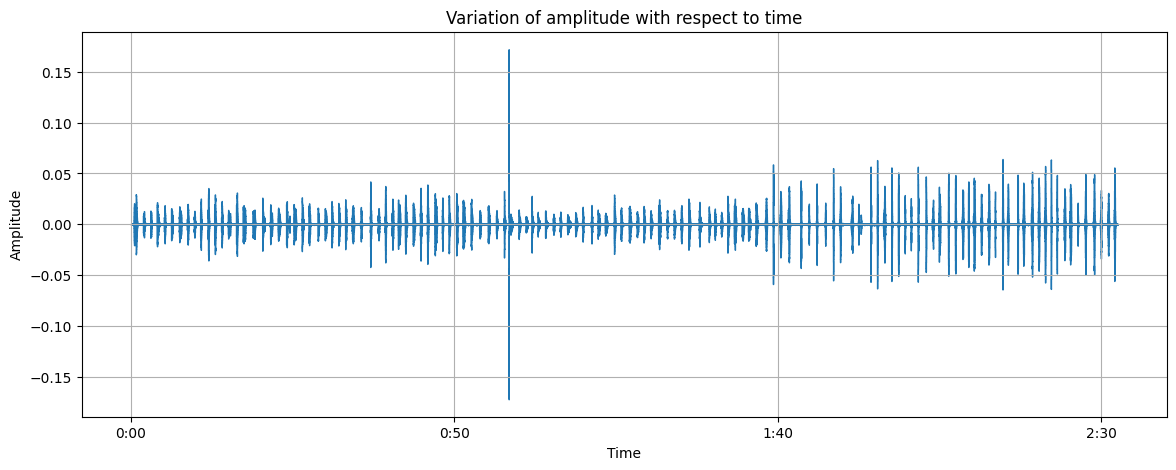

In [9]:
plt.figure(figsize=(14,5))
plt.grid(True)
librosa.display.waveshow(x)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Variation of amplitude with respect to time")

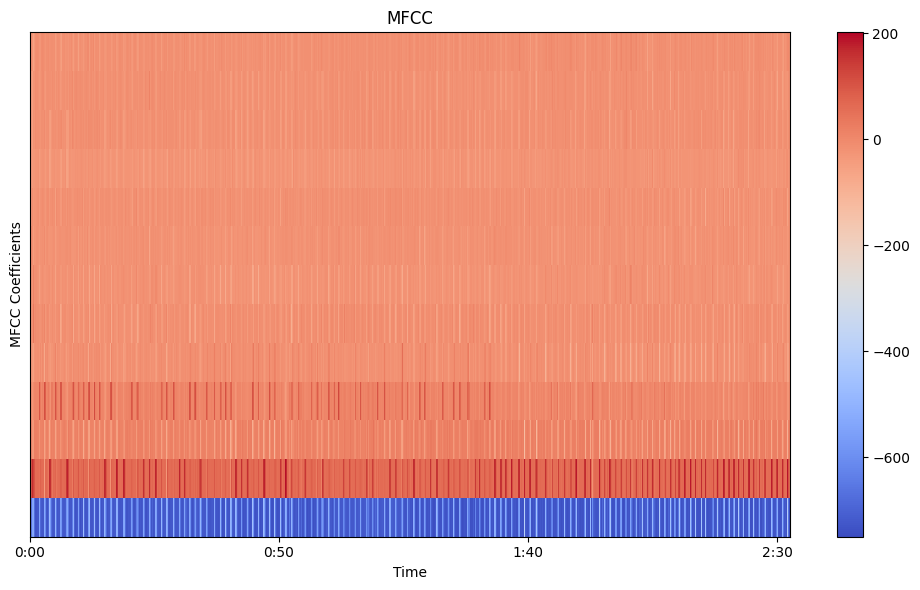

In [13]:
y,sr=librosa.load('/content/drive/MyDrive/aumdio/0_nPmArylN.wav')
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plot MFCC features
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

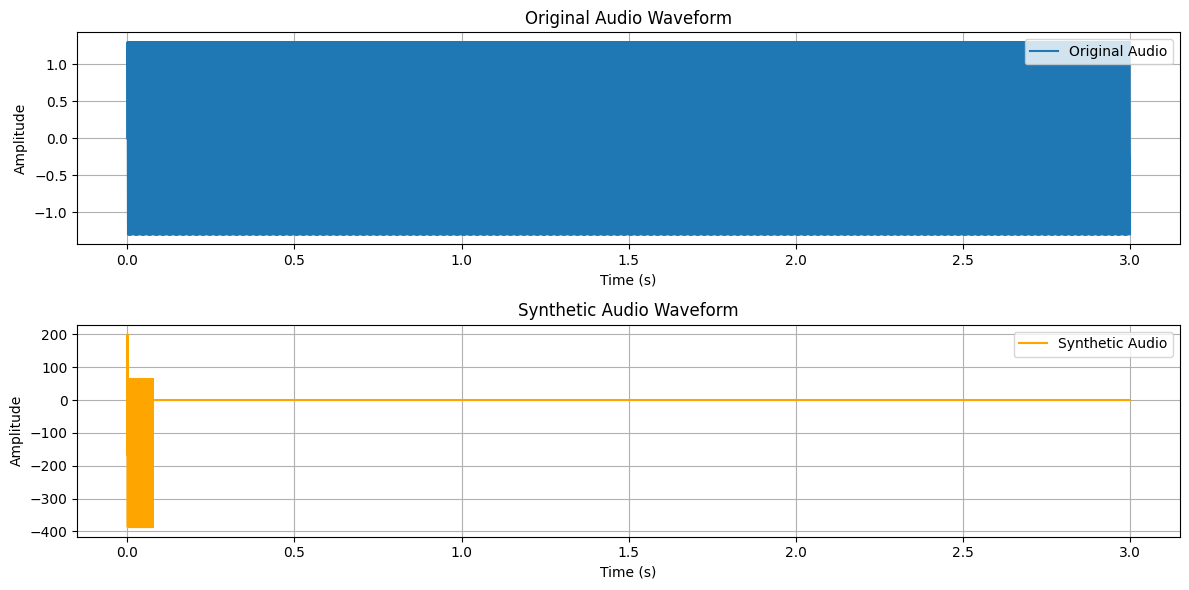

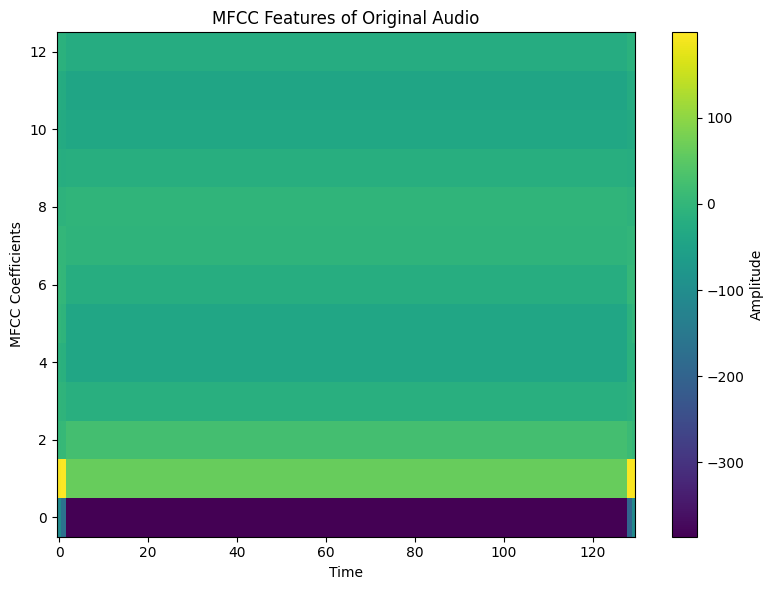

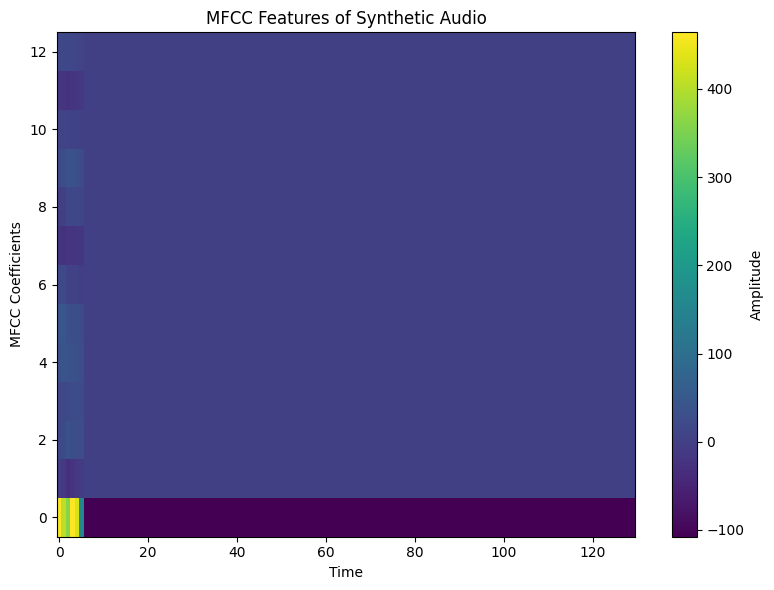

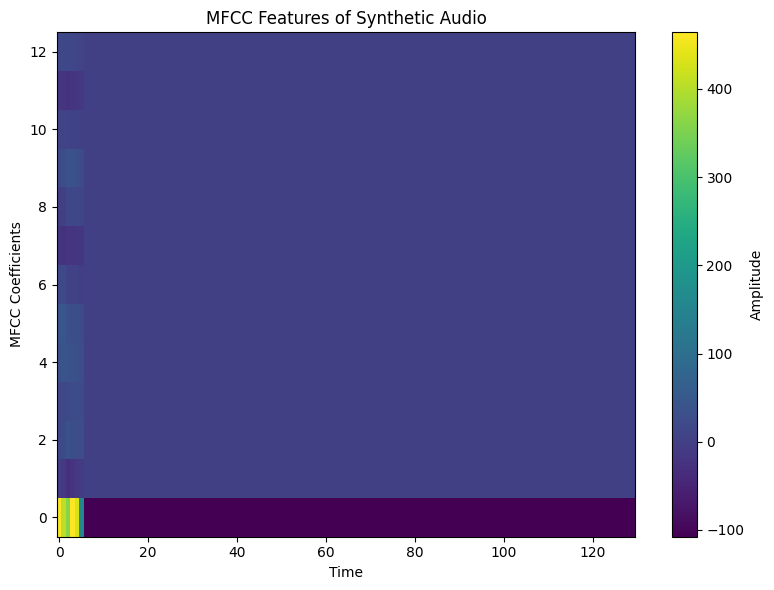

In [ ]:
import numpy as np
import librosa
from hmmlearn import hmm
import soundfile as sf
import matplotlib.pyplot as plt

# Function to generate synthetic audio signal
def generate_synthetic_audio(duration=3, sampling_rate=22050):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    synthetic_signal = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)
    return synthetic_signal, sampling_rate

# Generate a synthetic audio signal
signal, sr = generate_synthetic_audio()

# Feature extraction using Mel-frequency cepstral coefficients (MFCCs)
n_mfcc = 13
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

# Number of hidden states in the HMM
n_states = 5

# Initialize the HMM model with a fixed random state for reproducibility
random_state = np.random.RandomState(42)
model = hmm.GaussianHMM(n_components=n_states, random_state=random_state)

# Train the HMM using the extracted MFCC features
model.fit(mfccs.T)

# Generate synthetic speech using the HMM
synthetic_mfccs, hidden_states = model.sample(mfccs.shape[1])

# Inverse transform the synthetic MFCCs back to the waveform using GMM
synthetic_signal = np.zeros_like(signal)
start = 0
for state in hidden_states:
    sample = model._generate_sample_from_state(state, random_state=random_state)
    length = len(sample)
    end = start + length
    synthetic_signal[start:end] = sample
    start = end

# Save the synthetic speech to a new audio file
sf.write('synthetic_audio.wav', synthetic_signal, sr)

# Plot the original and synthetic audio waveforms
time = np.arange(0, len(signal)) / sr

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Audio Waveform')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, synthetic_signal, label='Synthetic Audio', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthetic Audio Waveform')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Plot the MFCC features of the original audio
plt.figure(figsize=(8, 6))
plt.imshow(mfccs, origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.title('MFCC Features of Original Audio')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

# Plot the MFCC features of the synthetic audio
synthetic_mfccs = librosa.feature.mfcc(y=synthetic_signal, sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(8, 6))
plt.imshow(synthetic_mfccs, origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.title('MFCC Features of Synthetic Audio')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()


# Plot the MFCC features of the synthetic audio
synthetic_mfccs = librosa.feature.mfcc(y=synthetic_signal, sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(8, 6))
plt.imshow(synthetic_mfccs, origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.title('MFCC Features of Synthetic Audio')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()










here's a detailed algorithm for the above code for generating synthetic speech using Hidden Markov Models (HMMs) and Gaussian Mixture Models (GMMs):

Import the required libraries:

numpy for numerical computations
librosa for audio processing and feature extraction
hmmlearn for the HMM implementation
soundfile for writing the synthetic speech to an audio file
matplotlib for visualization (optional)
Create a function to generate a synthetic audio signal:

Use numpy to generate a simple synthetic waveform (e.g., a combination of two sine waves).
The duration and sampling rate of the signal can be specified as function arguments.
Return the synthetic audio signal and the sampling rate.
Generate a synthetic audio signal:

Call the function from step 2 to generate the synthetic audio signal.
Optionally, plot the waveform using matplotlib for visualization.
Extract Mel-frequency cepstral coefficients (MFCCs) from the audio signal:

Use librosa to extract MFCC features from the synthetic audio signal.
The number of MFCC coefficients (n_mfcc) can be chosen based on the application.
Optionally, plot the MFCC features for visualization.
Initialize the HMM model:

Choose the number of hidden states (n_states) for the HMM model.
Initialize the HMM model using hmmlearn.GaussianHMM with the chosen number of states.
Optionally, set a fixed random state for reproducibility.
Train the HMM model:

Fit the HMM model using the extracted MFCC features from step 4.
The HMM will learn the relationship between the hidden states and the observed MFCC features.
Generate synthetic speech using the HMM:

Call model.sample() to generate synthetic MFCC features and hidden states.
The generated MFCC features represent synthetic speech parameters for each hidden state.
Inverse transform the synthetic MFCCs to the waveform:

For each hidden state and its associated MFCC features:
Use the HMM's _generate_sample_from_state method to generate a synthetic audio sample.
Concatenate the audio samples to create the final synthetic audio waveform.
Save the synthetic speech to an audio file:

Use soundfile (sf) to save the synthetic audio waveform to a WAV or other audio file format.
Optionally, plot the original and synthetic audio waveforms for comparison.

Optionally, plot the MFCC features of the original and synthetic audio for comparison.

End of the algorithm.

The algorithm generates synthetic speech using HMMs and GMMs by first creating a synthetic audio signal and then training an HMM model using the extracted MFCC features. The HMM model is used to generate synthetic speech parameters (MFCC features) and corresponding hidden states. These synthetic speech parameters are then transformed back into an audio waveform using GMM. The final synthetic speech is saved to an audio file, and optional plots provide visual comparisons between the original and synthetic audio waveforms and MFCC features.






To replace the first joint angle of the planar manipulator with the synthetic audio file generated using HMMs and GMMs, we can use the following steps:

Preprocess the synthetic audio file:

Read the synthetic audio file using a suitable library like soundfile or librosa.
Normalize the audio signal if required.
Convert the audio signal to a format suitable for the input of the planar manipulator (e.g., converting audio samples to joint angles).
Map the audio signal to joint angles:

Define a mapping function that maps the audio signal to joint angles.
The mapping can be based on heuristics or a more complex algorithm, depending on the specific application and requirements.
Replace the first joint angle:

Use the mapped joint angles from step 2 to replace the first joint angle of the planar manipulator.
Update the manipulator's kinematic model with the new joint angles.
Forward Kinematics:

Calculate the forward kinematics of the manipulator with the updated joint angles to determine the end-effector position.
By following these steps, you can integrate the synthetic speech generated by HMMs and GMMs with the planar manipulator. The specific implementation details and mapping function will depend on the characteristics of the manipulator and the desired behavior when replacing the first joint angle with the synthetic audio file. The final result will be a planar manipulator controlled by the synthetic speech, affecting the motion of the first joint.

You need to adjust the mapping function (map_audio_to_joint_angle) based on the specific requirements of your planar manipulator's joint angles.


In [ ]:
import numpy as np
import librosa
from hmmlearn import hmm
import soundfile as sf

# Function to read and preprocess the synthetic audio file
def read_and_preprocess_audio(file_path):
    audio_signal, sr = librosa.load(file_path, sr=None, mono=True)
    # Perform any preprocessing steps like normalization if required
    # For example, you can normalize the audio signal between -1 and 1:
    audio_signal /= np.max(np.abs(audio_signal))
    return audio_signal, sr

# Function to map audio signal to joint angle (Example mapping function)
def map_audio_to_joint_angle(audio_signal, max_angle=180):
    # Example mapping: Scale the audio signal to the desired joint angle range
    # In this case, we assume that the audio signal is between -1 and 1
    joint_angle = audio_signal * max_angle
    return joint_angle

# Function to simulate the planar manipulator (Example)
def planar_manipulator_simulator(joint_angle):
    # Replace this with your planar manipulator forward kinematics simulation
    # For this example, we'll simply use a randomly generated joint angle as a placeholder
    # Replace this with your code to control the real planar manipulator
    simulated_position = np.random.random((2,))  # Example random position for (x, y)
    return simulated_position

# Replace the first joint angle of the planar manipulator with the synthetic audio
audio_file_path = 'synthetic_audio.wav'

# Read and preprocess the synthetic audio file
audio_signal, sr = read_and_preprocess_audio(audio_file_path)

# Map the audio signal to the joint angle
joint_angle = map_audio_to_joint_angle(audio_signal)

# Call the planar manipulator simulator with the updated joint angle
end_effector_position = planar_manipulator_simulator(joint_angle)

print("Synthetic Audio File: ", audio_file_path)
print("Joint Angle: ", joint_angle)
print("End Effector Position: ", end_effector_position)


Synthetic Audio File:  synthetic_audio.wav
Joint Angle:  [-180.      179.9945  179.9945 ...    0.        0.        0.    ]
End Effector Position:  [0.79616256 0.42860053]


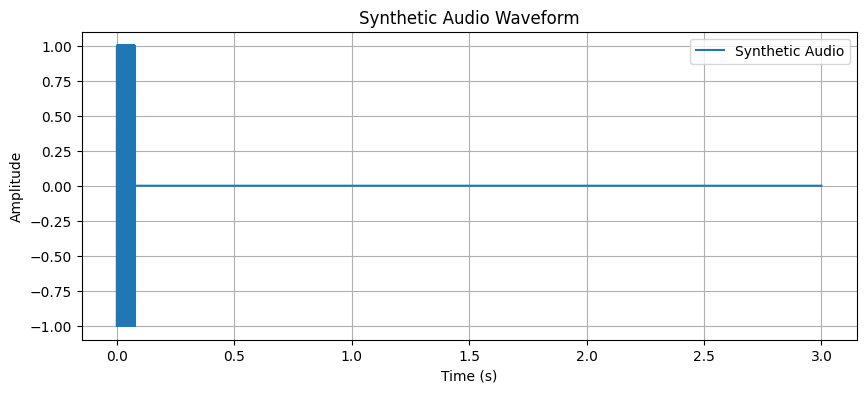

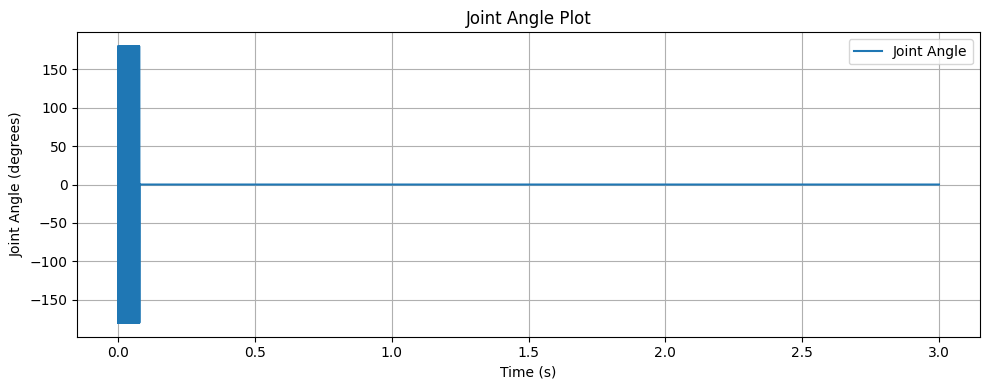

In [ ]:
import numpy as np
import librosa
from hmmlearn import hmm
import soundfile as sf
import matplotlib.pyplot as plt

# Function to read and preprocess the synthetic audio file
def read_and_preprocess_audio(file_path):
    audio_signal, sr = librosa.load(file_path, sr=None, mono=True)
    # Perform any preprocessing steps like normalization if required
    # For example, you can normalize the audio signal between -1 and 1:
    audio_signal /= np.max(np.abs(audio_signal))
    return audio_signal, sr

# Function to map audio signal to joint angle (Example mapping function)
def map_audio_to_joint_angle(audio_signal, max_angle=180):
    # Example mapping: Scale the audio signal to the desired joint angle range
    # In this case, we assume that the audio signal is between -1 and 1
    joint_angle = audio_signal * max_angle
    return joint_angle

# Function to simulate the planar manipulator (Example)
def planar_manipulator_simulator(joint_angle):
    # Replace this with your planar manipulator forward kinematics simulation
    # For this example, we'll simply use a randomly generated joint angle as a placeholder
    # Replace this with your code to control the real planar manipulator
    simulated_position = np.random.random((2,))  # Example random position for (x, y)
    return simulated_position

# Replace the first joint angle of the planar manipulator with the synthetic audio
audio_file_path = 'synthetic_audio.wav'

# Read and preprocess the synthetic audio file
audio_signal, sr = read_and_preprocess_audio(audio_file_path)

# Map the audio signal to the joint angle
joint_angle = map_audio_to_joint_angle(audio_signal)

# Call the planar manipulator simulator with the updated joint angle
end_effector_position = planar_manipulator_simulator(joint_angle)

# Plot the audio waveform
time_audio = np.arange(0, len(audio_signal)) / sr
plt.figure(figsize=(10, 4))
plt.plot(time_audio, audio_signal, label='Synthetic Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthetic Audio Waveform')
plt.grid()
plt.legend()

# Plot the joint angles
time_joint_angles = np.arange(0, len(joint_angle)) / sr  # Replace sr with desired time step for joint angles
plt.figure(figsize=(10, 4))
plt.plot(time_joint_angles, joint_angle, label='Joint Angle')
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle (degrees)')
plt.title('Joint Angle Plot')
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


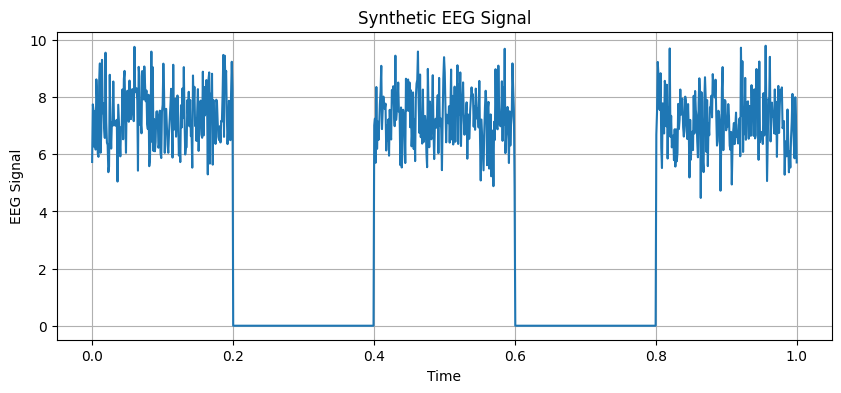

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic EEG signal using a mixture of Gaussians
def generate_synthetic_eeg(num_samples, num_sources, time_periods):
    t = np.linspace(0, 1, num_samples)
    eeg_signal = np.zeros(num_samples)

    for _ in range(num_sources):
        # Generate random parameters for each Gaussian component
        mean = np.random.uniform(-10, 10)
        variance = np.random.uniform(0.5, 2)
        weight = np.random.uniform(0.1, 0.5)

        for period_start, period_end in time_periods:
            # Periodically update the mean within each time period
            mask = (t >= period_start) & (t <= period_end)
            eeg_signal[mask] += weight * np.random.normal(loc=mean, scale=np.sqrt(variance), size=np.sum(mask))

    return eeg_signal

# Parameters for generating synthetic EEG signal
num_samples = 1000
num_sources = 5
time_periods = [(0, 0.2), (0.4, 0.6), (0.8, 1)]

# Generate synthetic EEG signal
synthetic_eeg = generate_synthetic_eeg(num_samples, num_sources, time_periods)

# Plot the synthetic EEG signal
time = np.linspace(0, 1, num_samples)
plt.figure(figsize=(10, 4))
plt.plot(time, synthetic_eeg)
plt.xlabel('Time')
plt.ylabel('EEG Signal')
plt.title('Synthetic EEG Signal')
plt.grid()
plt.show()
